In [46]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

from ripser import Rips
from persim import PersImage

In [47]:
cloud1 = [[random.uniform(-2,0), random.uniform(2,4)] for x in range(30)]
cloud2 = [[random.uniform(1,3), random.uniform(-3,1)] for x in range(30)]

data = np.concatenate([cloud1, cloud2])

In [48]:
rips = Rips()
dgms = rips.fit_transform(data)


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


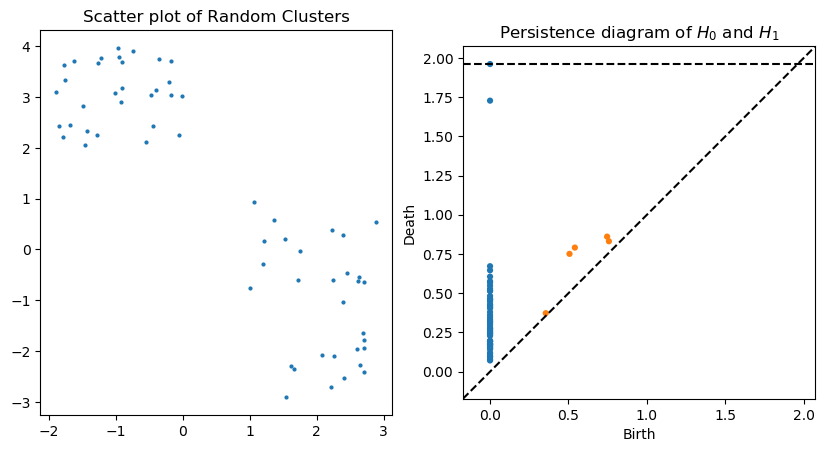

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of Random Clusters")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [50]:
zerohom = dgms[0]
firsthom = dgms[1]
x0,y0 = zip(*zerohom)
finalclustdeath = y0[-2]
print("The value when the two remaining clusters become one connected components is" , finalclustdeath)

The value when the two remaining clusters become one connected components is 1.7273715734481812


## Same data but now we will look at cheeger

In [51]:
mydata = pd.DataFrame(cloud1+cloud2, columns=["x","y"])

distances = []
edge_length = {}
for point1 in range(len(mydata)):
    x1,y1 = mydata.iloc[point1]
    for point2 in range(point1+1, len(mydata)):
        x2,y2 = mydata.iloc[point2]
        distance = np.sqrt((x1-x2)**2 + (y1-y2)**2)
        distances.append(distance)
        edge_length[(point1, point2)] = distance

In [52]:
from sklearn.cluster import KMeans as kmeans
def cluster_data(data, numclusters):
    labels = kmeans(n_clusters=numclusters).fit(data).labels_
    return [[x for x in range(len(data)) if labels[x] == clust] for clust in range(numclusters)], labels

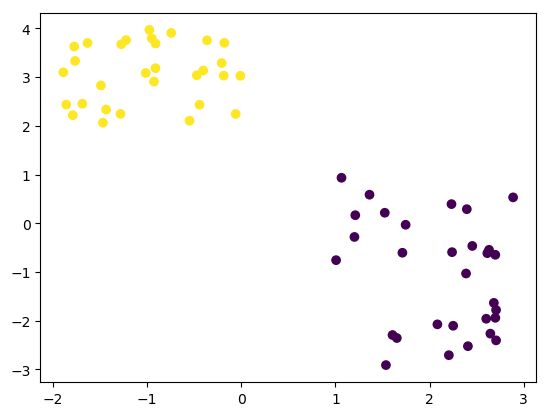

In [53]:
clust_test, mylabels = cluster_data(mydata, 2)
plt.scatter(mydata.x, mydata.y, c=mylabels)

In [54]:
# finding avg edge length in each clust
clustwise_avgs = []
for clust in clust_test:
    lengths = []
    for i, point1 in enumerate(clust):
        for j in range(i+1, len(clust)):
            point2 = clust[j]
            lengths.append(edge_length[(point1,point2)])
    clustwise_avgs.append(np.mean(lengths))
    

In [55]:
total_avg_length = np.mean(distances)
np.array(clustwise_avgs)/total_avg_length

array([0.48321911, 0.33214821])

In [56]:
#average distance between cluster 1 & cluster 2

def calc_cc(clust_test, clust1, clust2, clustwise_avgs):
    lengths = []
    for point1 in clust_test[clust1]:
        #compare point1 in cluster 1 to all vertices in cluster 2
        for point2 in clust_test[clust2]:
            #make it ordered so key is in dictionary
            mytuple = (min(point1, point2), max(point1, point2))

            lengths.append(edge_length[mytuple])

    return np.mean(lengths) / min(clustwise_avgs[clust1], clustwise_avgs[clust2])

In [57]:
cheeg = calc_cc(clust_test, 0,1, clustwise_avgs)
print("Cheeger constant is" , cheeg )

Cheeger constant is 4.734550495972436


In [58]:
print("So the two numbers that we are looking to compare are the cheeger constant and the location on the persistence barcode where we lose our final cluster separation. The cheeger is " , cheeg , "and the persistence number is " , finalclustdeath)

So the two numbers that we are looking to compare are the cheeger constant and the location on the persistence barcode where we lose our final cluster separation. The cheeger is  4.734550495972436 and the persistence number is  1.7273715734481812


In [59]:
cloud1 = [[random.uniform(-10,0), random.uniform(-2,2)] for x in range(50)]
cloud2 = [[random.uniform(20,21), random.uniform(0,0)] for x in range(1)]

data = np.concatenate([cloud1, cloud2])
mydata = pd.DataFrame(cloud1+cloud2, columns=["x","y"])

In [60]:
rips = Rips()
dgms = rips.fit_transform(data)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


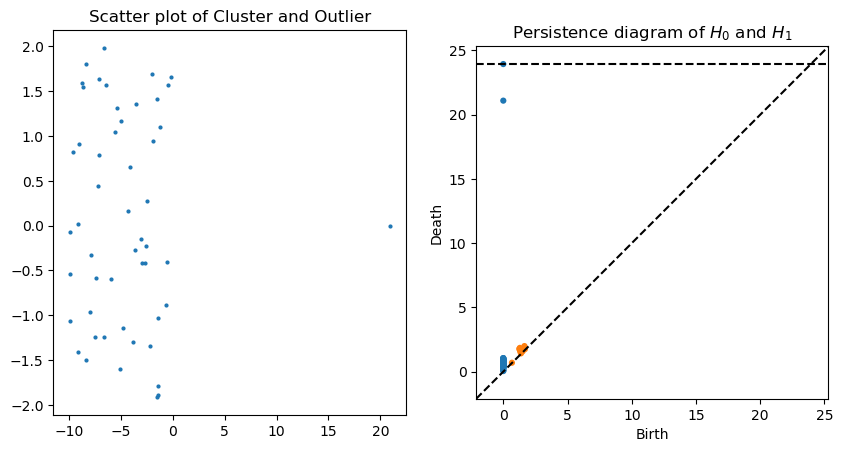

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of Cluster and Outlier")
plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [62]:
zerohom = dgms[0]
x0,y0 = zip(*zerohom)
finalclustdeath = y0[-2]
clust_test, mylabels = cluster_data(mydata, 2)
cheeg = calc_cc(clust_test, 0,1, clustwise_avgs)

In [63]:
print("With a single outlier, we see a cheeger value of " , cheeg , " and a final 0th homology value of " , finalclustdeath)

With a single outlier, we see a cheeger value of  2.983276150870381  and a final 0th homology value of  21.092016220092773


In [64]:
cloud1 = [[random.uniform(-20,0), random.uniform(-10,10)] for x in range(30)]
cloud2 = [[random.uniform(18,20), random.uniform(-1,1)] for x in range(30)]

data = np.concatenate([cloud1, cloud2])
mydata = pd.DataFrame(cloud1+cloud2, columns=["x","y"])


In [65]:
rips = Rips()
dgms = rips.fit_transform(data)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


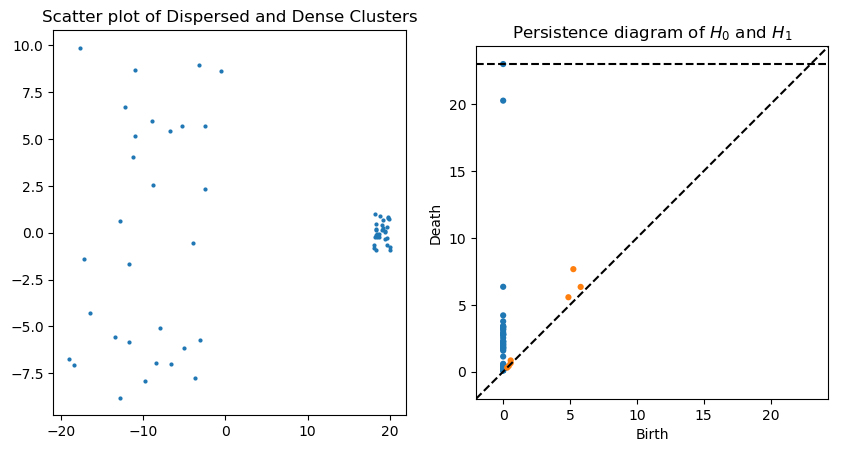

In [66]:

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of Dispersed and Dense Clusters")
plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [67]:
zerohom = dgms[0]
x0,y0 = zip(*zerohom)
finalclustdeath = y0[-2]
clust_test, mylabels = cluster_data(mydata, 2)
cheeg = calc_cc(clust_test, 0,1, clustwise_avgs)

In [68]:
print("With a very dispersed cluster and a very dense cluster, we see a cheeger value of " , cheeg , " and a final 0th homology value of " , finalclustdeath)

With a very dispersed cluster and a very dense cluster, we see a cheeger value of  4.734550495972437  and a final 0th homology value of  20.26553726196289


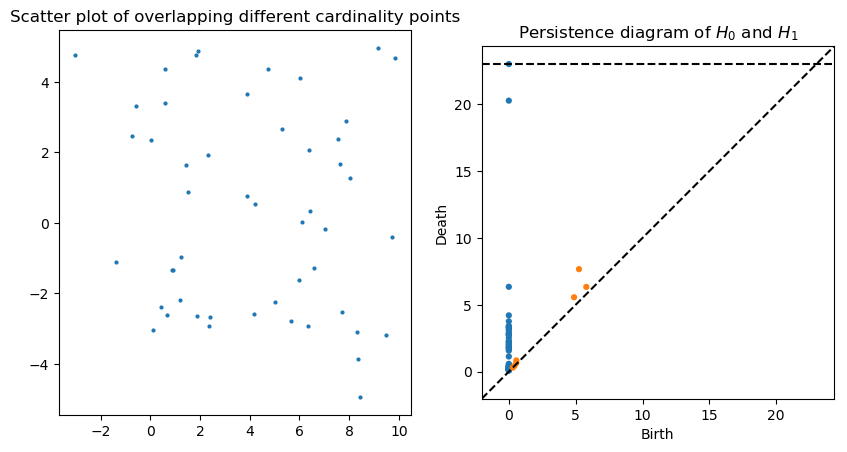

In [69]:
cloud1 = [[random.uniform(-5,5), random.uniform(-5,5)] for x in range(10)]
cloud2 = [[random.uniform(0,10), random.uniform(-5,5)] for x in range(40)]

data = np.concatenate([cloud1, cloud2])
mydata = pd.DataFrame(cloud1+cloud2, columns=["x","y"])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of overlapping different cardinality points")
plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

In [70]:
rips = Rips()
dgms = rips.fit_transform(data)
zerohom = dgms[0]
x0,y0 = zip(*zerohom)
finalclustdeath = y0[-2]
clust_test, mylabels = cluster_data(mydata, 2)
cheeg = calc_cc(clust_test, 0,1, clustwise_avgs)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


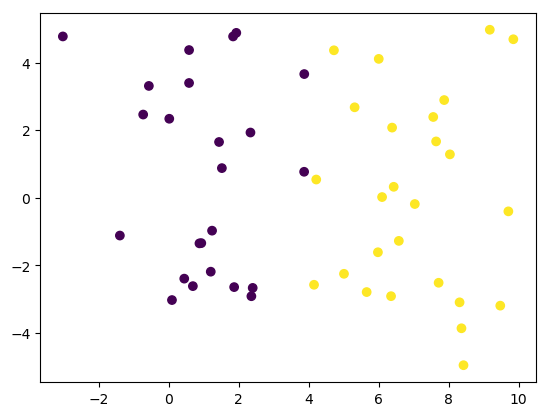

In [71]:
clust_test, mylabels = cluster_data(mydata, 2)
plt.scatter(mydata.x, mydata.y, c=mylabels)


In [72]:
print("With overlapping clusters of different cardinalities, we see a cheeger value of " , cheeg , " and a final 0th homology value of " , finalclustdeath)

With overlapping clusters of different cardinalities, we see a cheeger value of  2.9247976378608924  and a final 0th homology value of  2.860391855239868
